# **XGBoost 2**

In [5]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from ast import literal_eval
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **Importing the data**

In [7]:
df = pd.read_csv("C:/Users/micha/Desktop/FinalProject/top_repeated_climbs.csv")
coord_df = pd.read_csv("C:/Users/micha/Desktop/FinalProject/HoldFeature2016RightHand.csv")
df

,problem_id,url,start,mid,end,grade,user_grade,is_benchmark,repeats,problem_type,is_master,setter_id,setter_nickname,setter_firstname,setter_lastname,setter_city,setter_country,setter_profile_image_url,setter_can_share_data
0,21995,https://moonboard.com/Problems/View/21995/slowly,"[[7, 4], [4, 5]]","[[7, 7], [4, 9], [6, 12], [8, 15]]","[[6, 17]]",6B,6B+,False,37,NaN,False,4dce5d91-ba13-4e03-bace-ca7d5b81022d,redflavor,jung,HOJUN,cheongju,REPUBLIK OF KOREA,/Content/Account/Images/default-profile.png?63...,True
1,23406,https://moonboard.com/Problems/View/23406/wu-%...,"[[10, 4]]","[[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...","[[4, 17]]",6B,6B+,False,36,NaN,False,ACEAB249-E995-4EC0-A4E0-C7A3AAC74652,shinya okada,shinya,okada,kyoto,JAP,/Content/Account/Images/default-profile.png?63...,True
2,20712,https://moonboard.com/Problems/View/20712/warm...,"[[10, 4]]","[[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...","[[3, 17]]",6B,6B+,False,28,NaN,False,46A085A4-78F2-4D5C-82CB-97D2E29E1074,Ryan Johnson,Ryan,Johnson,Chattanooga,USA,/Content/Account/Images/default-profile.png?63...,True
3,312109,https://moonboard.com/Problems/View/312109/squ...,"[[2, 4], [3, 2]]","[[5, 8], [2, 10], [3, 12], [1, 14]]","[[6, 17]]",6B,6A+,False,21,NaN,False,66807cc9-36fa-4cdd-9fad-9f1f684d3359,Dave Scott,Dave,Scott,Rome,Italy,/Content/Account/Images/default-profile.png?63...,True
4,19928,https://moonboard.com/Problems/View/19928/high...,"[[7, 4]]","[[7, 7], [5, 9], [6, 12], [4, 15]]","[[6, 17]]",6B,NaN,False,15,NaN,False,7212FB0B-1D51-46BB-B985-E394AA8C6634,Brett Duffield,Brett,Duffield,Gillingham,UK,/Content/Account/Images/default-profile.png?63...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,348432,https://moonboard.com/Problems/View/348432/-h0t,"[[6, 3], [8, 3]]","[[8, 9], [4, 8]]","[[1, 17], [4, 17]]",8B+,NaN,False,0,NaN,False,3c927baf-7a37-4639-8746-d039da7f8ac4,Momentum Silver Street,mo,mentum,Houston,United States,/Content/Account/Images/default-profile.png?63...,True
316,348669,https://moonboard.com/Problems/View/348669/f%C...,"[[6, 3], [10, 4]]","[[9, 7], [10, 10], [7, 11], [5, 10], [2, 9], [...","[[0, 17]]",8B+,NaN,False,0,NaN,False,c4395b12-2b6d-4c84-b7d8-866d0ba232a3,gohtscho,Daniel,Schiefer,Ellwangen,Germany,/Content/Account/Images/default-profile.png?63...,True
317,348670,https://moonboard.com/Problems/View/348670/f%C...,"[[1, 2]]","[[5, 4], [2, 9], [5, 10], [8, 9], [10, 8]]","[[0, 17]]",8B+,NaN,False,0,NaN,False,c4395b12-2b6d-4c84-b7d8-866d0ba232a3,gohtscho,Daniel,Schiefer,Ellwangen,Germany,/Content/Account/Images/default-profile.png?63...,True
318,348858,https://moonboard.com/Problems/View/348858/sym...,"[[5, 4]]","[[7, 12], [5, 12]]","[[1, 17]]",8B+,NaN,False,0,NaN,False,52335328-eb2c-4780-ac77-acbda91c4952,Steph,Stephanie,Nikolic,Chapel Hill,United States,/Content/Account/Images/default-profile.png?63...,True


## **Getting rid of redundant columns**

In [8]:
desired_columns = ['start', 'mid', 'end', 'grade']
df = df[desired_columns]
df

,start,mid,end,grade
0,"[[7, 4], [4, 5]]","[[7, 7], [4, 9], [6, 12], [8, 15]]","[[6, 17]]",6B
1,"[[10, 4]]","[[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...","[[4, 17]]",6B
2,"[[10, 4]]","[[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...","[[3, 17]]",6B
3,"[[2, 4], [3, 2]]","[[5, 8], [2, 10], [3, 12], [1, 14]]","[[6, 17]]",6B
4,"[[7, 4]]","[[7, 7], [5, 9], [6, 12], [4, 15]]","[[6, 17]]",6B
...,...,...,...,...
315,"[[6, 3], [8, 3]]","[[8, 9], [4, 8]]","[[1, 17], [4, 17]]",8B+
316,"[[6, 3], [10, 4]]","[[9, 7], [10, 10], [7, 11], [5, 10], [2, 9], [...","[[0, 17]]",8B+
317,"[[1, 2]]","[[5, 4], [2, 9], [5, 10], [8, 9], [10, 8]]","[[0, 17]]",8B+
318,"[[5, 4]]","[[7, 12], [5, 12]]","[[1, 17]]",8B+


## **Making a new hold sequence column and sorting it into a viable order**

This function assumes the next hold is always the next closest hold which isn’t always the case but is a improvement from the dataset as it originally contained sequences that where impossible where the sequence would have the climber ascend to the top section of the board and back down to the bottom section in a few moves defeating the purpose of the moonboard to incrementally move closer to the end hold.

In [9]:
def custom_sort_with_new_condition(coordinates):
    # Sort the coordinates based on the y value
    sorted_by_y = sorted(coordinates, key=lambda x: x[1])

    # Special case for the first two elements if they have the same y value
    if len(sorted_by_y) > 2 and sorted_by_y[0][1] == sorted_by_y[1][1]:
        third_x = sorted_by_y[2][0]
        sorted_by_y[:2] = sorted(sorted_by_y[:2], key=lambda x: abs(x[0] - third_x))

    # Then, sort by the x value proximity for those with the same y value
    i = 1  # Start from the second element as the first two are already sorted if needed
    while i < len(sorted_by_y) - 1:
        start_i = i
        while i < len(sorted_by_y) - 1 and sorted_by_y[i][1] == sorted_by_y[i + 1][1]:
            i += 1

        # Sort by proximity to the previous x value for items with the same y value
        if i > start_i:
            previous_x = sorted_by_y[start_i - 1][0]
            sorted_by_y[start_i:i + 1] = sorted(sorted_by_y[start_i:i + 1], key=lambda x: abs(x[0] - previous_x))

        i += 1

    return sorted_by_y

df['start'] = df['start'].apply(literal_eval)
df['mid'] = df['mid'].apply(literal_eval)
df['end'] = df['end'].apply(literal_eval)

df['combined'] = df.apply(lambda row: row['start'] + row['mid'] + row['end'], axis=1)

df['sorted_combined'] = df['combined'].apply(custom_sort_with_new_condition)

df = df.drop(['combined'],axis=1)

df

C:\Users\micha\AppData\Local\Temp\ipykernel_12488\1147426115.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['start'].apply(literal_eval)
C:\Users\micha\AppData\Local\Temp\ipykernel_12488\1147426115.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mid'] = df['mid'].apply(literal_eval)
C:\Users\micha\AppData\Local\Temp\ipykernel_12488\1147426115.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,start,mid,end,grade,sorted_combined
0,"[[7, 4], [4, 5]]","[[7, 7], [4, 9], [6, 12], [8, 15]]","[[6, 17]]",6B,"[[7, 4], [4, 5], [7, 7], [4, 9], [6, 12], [8, ..."
1,"[[10, 4]]","[[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...","[[4, 17]]",6B,"[[10, 4], [9, 6], [6, 7], [7, 9], [5, 11], [6,..."
2,"[[10, 4]]","[[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...","[[3, 17]]",6B,"[[10, 4], [5, 6], [6, 8], [4, 9], [4, 11], [2,..."
3,"[[2, 4], [3, 2]]","[[5, 8], [2, 10], [3, 12], [1, 14]]","[[6, 17]]",6B,"[[3, 2], [2, 4], [5, 8], [2, 10], [3, 12], [1,..."
4,"[[7, 4]]","[[7, 7], [5, 9], [6, 12], [4, 15]]","[[6, 17]]",6B,"[[7, 4], [7, 7], [5, 9], [6, 12], [4, 15], [6,..."
...,...,...,...,...,...
315,"[[6, 3], [8, 3]]","[[8, 9], [4, 8]]","[[1, 17], [4, 17]]",8B+,"[[6, 3], [8, 3], [4, 8], [8, 9], [4, 17], [1, ..."
316,"[[6, 3], [10, 4]]","[[9, 7], [10, 10], [7, 11], [5, 10], [2, 9], [...","[[0, 17]]",8B+,"[[6, 3], [5, 4], [10, 4], [9, 7], [4, 7], [2, ..."
317,"[[1, 2]]","[[5, 4], [2, 9], [5, 10], [8, 9], [10, 8]]","[[0, 17]]",8B+,"[[1, 2], [5, 4], [10, 8], [8, 9], [2, 9], [5, ..."
318,"[[5, 4]]","[[7, 12], [5, 12]]","[[1, 17]]",8B+,"[[5, 4], [5, 12], [7, 12], [1, 17]]"


## **Engineering new features to characterise the climbs**

In [10]:
def find_difficulty(coord, coord_df):
    x, y = coord
    difficulty = coord_df[(coord_df['X_coord'] == x) & (coord_df['Y_coord'] == y)]['Difficulties']
    return difficulty.iloc[0] if not difficulty.empty else 0

def calculate_start_difficulty(coords, coord_df):
    if len(coords) == 1:
        return find_difficulty(coords[0], coord_df)
    else:  # Two start holds
        difficulties = [find_difficulty(coord, coord_df) for coord in coords]
        return min(difficulties)

def calculate_section_difficulty(coords, coord_df, include_last_as_origin=True):
    total_difficulty = 0
    for i in range(len(coords) - 1):
        # Calculate difficulty and distance
        difficulty_origin = find_difficulty(coords[i], coord_df)
        difficulty_end = find_difficulty(coords[i + 1], coord_df)
        distance = math.sqrt((coords[i + 1][0] - coords[i][0]) ** 2 + (coords[i + 1][1] - coords[i][1]) ** 2)

        # Calculate movement difficulty
        movement_difficulty = difficulty_origin * distance * difficulty_end
        total_difficulty += movement_difficulty

        # If the last hold should also be considered as an origin
        if include_last_as_origin and i == len(coords) - 2:
            total_difficulty += difficulty_end * distance  # Using the same distance for simplicity

    return total_difficulty

def calculate_total_distance(coords):
    total_distance = 0
    for i in range(len(coords) - 1):
        x1, y1 = coords[i]
        x2, y2 = coords[i + 1]
        distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        total_distance += distance
    return total_distance

def calculate_movement_difficulty(coords, coord_df, two_start_holds):
    most_difficult_movement = 0
    start_index = 1 if two_start_holds == 1 else 0

    for i in range(start_index, len(coords) - 1):
        x1, y1 = coords[i]
        x2, y2 = coords[i + 1]

        # Calculate difficulty and distance
        difficulty_origin = find_difficulty((x1, y1), coord_df)
        difficulty_end = find_difficulty((x2, y2), coord_df)
        distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

        # Calculate movement difficulty
        movement_difficulty = difficulty_origin * distance * difficulty_end
        most_difficult_movement = max(most_difficult_movement, movement_difficulty)

    return most_difficult_movement

def calculate_end_difficulty(mid_coords, end_coords, coord_df):
    if not mid_coords or not end_coords:
        return 0

    # Last coordinate in the mid section
    x1, y1 = mid_coords[-1]

    # First coordinate in the end section
    x2, y2 = end_coords[0]

    # Calculate difficulty of the last mid hold and the first end hold
    difficulty_mid = find_difficulty((x1, y1), coord_df)
    difficulty_end = find_difficulty((x2, y2), coord_df)

    # Calculate the distance between these two holds
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

    # Calculate end difficulty
    end_difficulty = difficulty_mid * distance * difficulty_end

    return end_difficulty

# Update the DataFrame calculation for end_difficulty

df['two_start_holds'] = df['start'].apply(lambda x: 1 if len(x) == 2 else 0)
df['number_of_holds'] = df['sorted_combined'].apply(lambda x: len(x))
df['hand_distance'] = df['sorted_combined'].apply(calculate_total_distance)
df['start_difficulty'] = df['start'].apply(lambda coords: calculate_start_difficulty(coords, coord_df))
df['mid_difficulty'] = df['mid'].apply(lambda coords: calculate_section_difficulty(coords, coord_df))
df['end_difficulty'] = df.apply(lambda row: calculate_end_difficulty(row['mid'], row['end'], coord_df), axis=1)
df['total_difficulty'] = df['start_difficulty'] + df['mid_difficulty'] + df['end_difficulty']
df['average_difficulty'] = df.apply(
    lambda row: row['total_difficulty'] / (row['number_of_holds'] - 1) if row['two_start_holds'] == 1
               else row['total_difficulty'] / row['number_of_holds'],
    axis=1
)
df['most_difficult_movement'] = df.apply(lambda row: calculate_movement_difficulty(row['sorted_combined'], coord_df, row['two_start_holds']), axis=1)

df = df.drop(['sorted_combined','start','mid','end','two_start_holds'],axis=1)

df

,grade,number_of_holds,hand_distance,start_difficulty,mid_difficulty,end_difficulty,total_difficulty,average_difficulty,most_difficult_movement
0,6B,7,20.412910,3,346.132922,135.764502,484.897424,80.816237,151.433154
1,6B,10,18.355763,9,438.865589,50.911688,498.777277,49.877728,101.823376
2,6B,9,21.393932,9,257.246118,76.367532,342.613650,38.068183,145.399450
3,6B,7,21.737066,3,108.646061,186.590461,298.236522,49.706087,186.590461
4,6B,6,15.424683,3,296.768037,90.509668,390.277705,65.046284,110.679718
...,...,...,...,...,...,...,...,...,...
315,8B+,6,24.470502,6,86.585218,256.144490,348.729709,69.745942,482.990683
316,8B+,10,37.949018,8,605.376364,487.493590,1100.869954,122.318884,320.000000
317,8B+,7,30.875931,6,402.780314,470.876842,879.657156,125.665308,313.753088
318,8B+,4,17.810250,7,20.000000,115.256236,142.256236,35.564059,281.168988


## **Normalizing my data, although not require in a tree based model**

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Features to be normalized
features_to_normalize = ['number_of_holds', 'hand_distance', 'start_difficulty',
                         'mid_difficulty', 'end_difficulty', 'total_difficulty',
                         'average_difficulty', 'most_difficult_movement']

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

## **Encoding the grades into smaller catrgories**

In [12]:
#  Define a function to map grades to groups
def map_grade_to_group(grade):
    if grade in ['6B', '6B+', '6C', '6C+']:
        return 0
    elif grade in ['7A', '7A+', '7B', '7B+']:
        return 1
    elif grade in ['7C', '7C+', '8A', '8A+']:
        return 2
    elif grade in ['8B', '8B+']:
        return 3
    else:
        return None

# Apply the function to the 'grade' column
df['grade_group'] = df['grade'].apply(map_grade_to_group)

## **Declaring my X and y variables**

In [13]:
# Declaring 'grade' as the target variable y
y = df['grade_group']

# Declaring X
X = df.drop(['grade','grade_group'], axis=1)

## **Checking for null values before i split my data**

In [14]:
null_values = df.isnull().sum()

null_values

grade                      0
number_of_holds            0
hand_distance              0
start_difficulty           0
mid_difficulty             0
end_difficulty             0
total_difficulty           0
average_difficulty         0
most_difficult_movement    0
grade_group                0
dtype: int64

## **Initisalising XGBOOST**

In [15]:
clf = xgb.XGBClassifier(objective='multi:softprob', random_state=42)

## **Splitting into train and testing data**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Fitting the classifier**

In [17]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## **Predicting on the test data**

In [18]:
y_pred = clf.predict(X_test)

# **Evaluate the classifier**

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.390625


## **Getting feature importance**

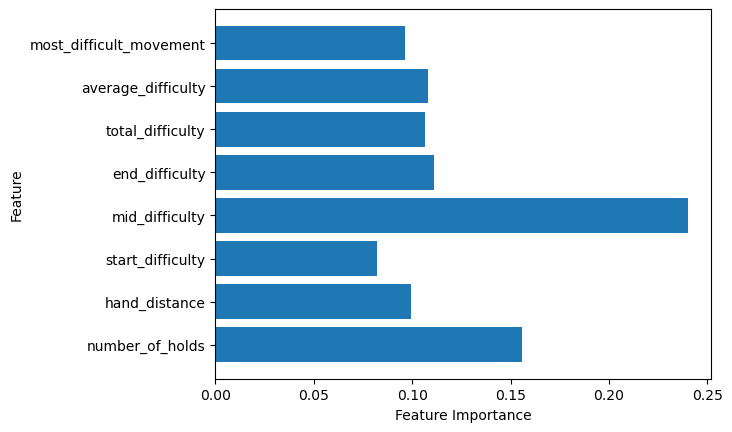

In [20]:
# Get feature importances
feature_importances = clf.feature_importances_

# Visualize
plt.barh(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

## **creating a confusion Matrix**

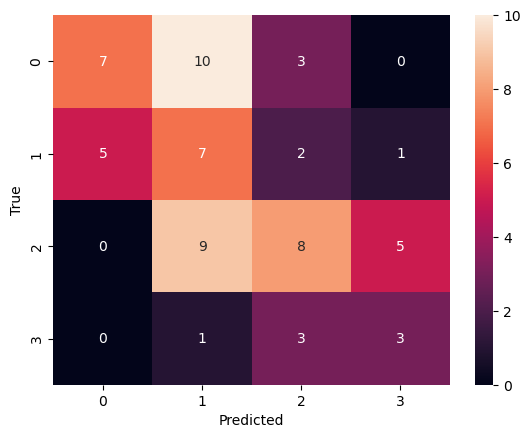

In [21]:
# Predict the labels
y_pred = clf.predict(X_test)

# get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()